# Analysis on PUMA brand social media branding strategies using twitter platform

Importing libraries

In [1]:
#!pip install tweepy
#!pip install langdetect
#!pip install contractions
#!pip install wordcloud 
#!pip install vaderSentiment
#nltk.download
#pip install genism
import pandas as pd
import numpy as np
import warnings
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import re
import unidecode
import gensim.corpora as corpora
import contractions
import nltk
from datetime import date, timedelta
from dateutil.rrule import rrule, DAILY
from tqdm import tqdm
from langdetect import detect
from bs4 import BeautifulSoup as bs
from pprint import pprint
from nltk import sent_tokenize, word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from keybert import KeyBERT
from gensim.utils import simple_preprocess
warnings.filterwarnings("ignore")

In [2]:
#To access to the Tweepy API create a developer account 

API_key = "WHqoszTiXyHWGujliHyEgnMzZ"

API_secret = "ABQIqEsEvXuTD6dXbtBaigWOvDC0BiGWZNHh0X4wd1HPYCVdRD"

access_token = "2577257425-Ma8DOKKJdMMZe0VGWDIm7u7hDIqZtZsXEBWiXAe"

access_token_secret = "iXT2j0yrDKLL5XT7tGAzqbSxULStftibCOU8oAPJXMBqw"

auth = tweepy.OAuthHandler(API_key, API_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
def extract_tweets(text):
    Tw_df = pd.DataFrame()
    
    print("Extract tweets containting text: ",text)

    for i in tqdm(range(10)):
        day = date.today() + timedelta(days=i*-1)        

        tweets_ds = api.search_tweets(text, tweet_mode="extended",lang="en",count=140,until = day) 
        
        df_tweets = [[tweet.created_at, tweet.full_text,tweet.retweet_count,tweet.favorite_count,tweet.user.screen_name,tweet.user.followers_count] for tweet in tweets_ds]

        tweet_text = pd.DataFrame(data=df_tweets,columns=["created_at","full_text","retweet_count","likes","user_screen_name","user_follower_count"])        

        Tw_df = pd.concat([Tw_df, tweet_text],ignore_index=True)        
        
    return Tw_df

In [4]:
puma_tweets = extract_tweets("#puma OR @puma ")

In [5]:
#df_scrape = pd.concat([puma_tweets],ignore_index=True)
df_scrape.shape

(1000, 6)

In [6]:
df_scrape.head(25)

,created_at,full_text,retweet_count,likes,user_screen_name,user_follower_count
0,2023-01-20 23:59:49+00:00,RT @antony00: See you all later 😼💨\n@pumafootb...,2760,0,Neguin0305,314
1,2023-01-20 23:57:08+00:00,@antony00 @pumafootball Try using your right f...,0,0,therealeagh,1025
2,2023-01-20 23:56:47+00:00,RT @antony00: See you all later 😼💨\n@pumafootb...,2760,0,_johnamoo,4943
3,2023-01-20 23:56:04+00:00,RT @antony00: See you all later 😼💨\n@pumafootb...,2760,0,unknown_td2,44
4,2023-01-20 23:55:26+00:00,RT @Anerobeezy2: @antony00 @pumafootball Repea...,4,0,Royal_MacVities,31
5,2023-01-20 23:54:29+00:00,RT @antony00: See you all later 😼💨\n@pumafootb...,2760,0,erikahnino395,2071
6,2023-01-20 23:53:59+00:00,RT @antony00: See you all later 😼💨\n@pumafootb...,2760,0,hmarley777,31
7,2023-01-20 23:53:54+00:00,RT @antony00: See you all later 😼💨\n@pumafootb...,2760,0,Rayridarz,123
8,2023-01-20 23:53:39+00:00,@antony00 @pumafootball Maybe you could actual...,0,0,SnitchMcConnel,481
9,2023-01-20 23:49:14+00:00,@antony00 @pumafootball U are not necessary fo...,0,0,Yayatouray38560,229


In [7]:
#df_scrape.to_csv("rC:\Users\Praneeth\Desktop\DSMA SUBMISSION\DSMA_TEXT_DATA.csv",index = False)

In [8]:
df_scrape.isna().sum()

created_at             0
full_text              0
retweet_count          0
likes                  0
user_screen_name       0
user_follower_count    0
dtype: int64

In [9]:
df_scrape['Language'] = df_scrape.full_text.apply(lambda text: detect(text))
df_scrape['Language'].value_counts() 

en    970
de      5
et      4
pt      4
sv      3
ca      2
it      2
so      2
cy      2
es      1
ro      1
fr      1
af      1
fi      1
id      1
Name: Language, dtype: int64

In [10]:
#selecting the desired languagae of text
df_scrape = df_scrape[df_scrape['Language']=="en"]
df_scrape.shape

(970, 7)

In [11]:
# removing duplicate tweets

df_scrape.duplicated(subset='full_text', keep= 'first').sum()
print('Duplicate tweets :',df_scrape.duplicated(subset='full_text', keep= 'first').sum())

df_scrape = df_scrape.drop_duplicates(subset='full_text', keep= 'first')
print('Number of tweets after removing duplicates :',df_scrape.full_text.count())

Duplicate tweets : 424
Number of tweets after removing duplicates : 546


In [12]:
df_scrape.head(2)

,created_at,full_text,retweet_count,likes,user_screen_name,user_follower_count,Language
0,2023-01-20 23:59:49+00:00,RT @antony00: See you all later 😼💨\n@pumafootb...,2760,0,Neguin0305,314,en
1,2023-01-20 23:57:08+00:00,@antony00 @pumafootball Try using your right f...,0,0,therealeagh,1025,en


In [13]:
def html_Tag(text):
    soup = bs(text, "html.parser")
    new_text=soup.get_text(separator=" ")
    return new_text
df_scrape['cleaned_text']=df_scrape['full_text'].apply(lambda text:html_Tag(text))
print(df_scrape.cleaned_text.iloc[3])

def removenewlines(text):
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').\
    replace('\\', ' ').replace('. com', '.com')
    return Formatted_text
df_scrape['cleaned_text']=df_scrape['cleaned_text'].apply(lambda text: removenewlines(text))
print(df_scrape.cleaned_text.iloc[3])

def whitespace(text):
    pn=re.compile(r'\s+')
    text_new=re.sub(pn,' ',text)
    return text_new
df_scrape['cleaned_text']=df_scrape['cleaned_text'].apply(lambda text :whitespace(text))
print(df_scrape.cleaned_text.iloc[3])


def rev(text):
    text=unidecode.unidecode(text)
    return text
df_scrape['cleaned_text']=df_scrape['cleaned_text'].apply(lambda text : rev(text))
print(df_scrape.cleaned_text.iloc[3])

def link(text):
    rev_link=re.sub(r'http\S+','',text)
    rev_com=re.sub(r'\[A-Za-z]*\.com','',rev_link)
    return rev_com
df_scrape['cleaned_text']=df_scrape['cleaned_text'].apply(lambda text :link(text))
print(df_scrape.cleaned_text.iloc[3])


def rev_puc(text):
    Formatted_text=re.sub(r"[^a-zA-Z0-9:$-,%.?!]+",' ',text)
    Formatted_text2=re.sub(r"[()]+",' ',Formatted_text)
    return Formatted_text2
df_scrape['cleaned_text']=df_scrape['cleaned_text'].apply(lambda text:rev_puc(text))
print(df_scrape.cleaned_text.iloc[3])


def rev_alpha(text):
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    Formatted_text = Pattern_alpha.sub(r"\1\1", text)
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    return Final_Formatted


@antony00 @pumafootball Maybe you could actually run in transition then 🫶
@antony00 @pumafootball Maybe you could actually run in transition then 🫶
@antony00 @pumafootball Maybe you could actually run in transition then 🫶
@antony00 @pumafootball Maybe you could actually run in transition then 
@antony00 @pumafootball Maybe you could actually run in transition then 
 antony00 pumafootball Maybe you could actually run in transition then 


In [14]:
df_scrape['cleaned_text']=df_scrape['cleaned_text'].apply(lambda text:rev_alpha(text))

df_scrape['cleaned_text'] = df_scrape.cleaned_text.apply(lambda text: text.lower())


df_scrape.cleaned_text.iloc[3]

' antony00 pumafootball maybe you could actually run in transition then '

In [15]:
df_scrape.cleaned_text.iloc[5]

' antony00 pumafootball go see b fernandes8'

# Identify keywords,hashtags who  play role in the brand campaign.

In [16]:
corpus_list = ".".join(df_scrape.cleaned_text.values)

In [17]:
corpus_list

"rt antony00: see you all later pumafootball pumaultra . antony00 pumafootball try using your right foot sometimes .rt anerobeezy2: antony00 pumafootball repeat this against arsenals on sunday . antony00 pumafootball maybe you could actually run in transition then . antony00 pumafootball u are not necessary for 100m i swear. antony00 pumafootball go see b fernandes8. antony00 pumafootball thought u were left footed . antony00 pumafootball you're welcome back at selhurst park to cry anytime you like. . mrfrancis83 antony00 pumafootball i wonder if this kind of demand is directed to the other players or just towards him? i genuinely want to know. neo dante007 antony00 pumafootball the guy is so frustrating to watch.catch me if you can pumafootball pumaultra . onaiwu2 dennis antony00 pumafootball impressive! you sound very professional, those guidelines, etc., are you a coach manager?.so good i had to share! check out all the items i'm loving on poshmarkapp from familygood4 poshmark fashi

In [18]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['puma','pumas']) #removing puma to avoid it in keywordextraction


In [19]:
kw_model = KeyBERT(model='all-mpnet-base-v2')
keywords = kw_model.extract_keywords(corpus_list, 
                                     keyphrase_ngram_range=(1, 1), 
                                     stop_words='english', 
                                     highlight=False,
                                     top_n=30)
                    
keywords_list= list(dict(keywords).keys())

for keyword in keywords:
     print(keyword)

('pumafootball', 0.5438)
('pulisic', 0.4713)
('pumasportswear', 0.4379)
('nikefootball', 0.4169)
('pumastyle', 0.409)
('pumasportstyle', 0.399)
('shoe', 0.3976)
('footballer', 0.3961)
('footballers', 0.3929)
('puma', 0.3876)
('adidas', 0.3831)
('pumafam', 0.3824)
('pumamen', 0.3794)
('shoegasm', 0.3785)
('nike', 0.3758)
('pumas', 0.3732)
('pumafrance', 0.3702)
('ibrahimovic', 0.3643)
('adidasoriginals', 0.3616)
('footwear', 0.3594)
('btsportfootball', 0.3567)
('pumagymwear', 0.3543)
('pumateamwear', 0.353)
('ultrafootballau', 0.3528)
('pumawomen', 0.3514)
('pu', 0.3493)
('chelsea', 0.347)
('foot', 0.3466)
('kicks', 0.3439)
('pumagolf', 0.3433)


In [20]:
df_score = pd.DataFrame(keywords,columns = ['Key_word','score'])
df_score

,Key_word,score
0,pumafootball,0.5438
1,pulisic,0.4713
2,pumasportswear,0.4379
3,nikefootball,0.4169
4,pumastyle,0.4090
5,pumasportstyle,0.3990
6,shoe,0.3976
7,footballer,0.3961
8,footballers,0.3929
9,puma,0.3876


In [21]:
#df_score.to_csv(r"C:\Users\Praneeth\Desktop\DSMA SUBMISSION\KEYWORD.csv",index = False)

# TOKENIZATION OF TEXT DATA

In [22]:
def tokenize_only(text):

    tokens = [word.lower() 
              for sent in nltk.sent_tokenize(text) 
              for word in nltk.word_tokenize(sent) 
              if word.lower() not in stopwords]
    
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [23]:
tokenize_df= []
for i in range(len(df_scrape)):
    tokenize_df.extend(tokenize_only(df_scrape['cleaned_text'].iloc[i]))

In [24]:
def extract_tweets(text):
    df = pd.DataFrame()
    
    print("Extract tweets containting text: ",text)

    for i in tqdm(range(10)):
        day = date.today() + timedelta(days=i*-1)        

        tweets = api.search_tweets(text, tweet_mode="extended",lang="en",count=140,until = day) 
        #to do: check how many attributes can we get from tweet objects
        data_tweets = [[tweet.created_at, tweet.full_text,tweet.retweet_count,tweet.favorite_count,tweet.user.screen_name,tweet.user.followers_count] for tweet in tweets]

        tweet_text_df = pd.DataFrame(data=data_tweets,columns=["created_at","full_text","retweet_count","likes","user_screen_name","user_follower_count"])        

        df = pd.concat([df, tweet_text_df],ignore_index=True)        
        
    return df

# VISUALIZATION OF WORDS USING WORD CLOUD

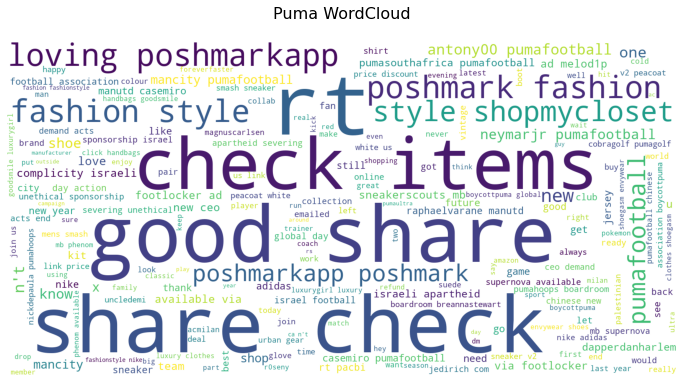

In [25]:
def word_cloud(df3, title):
    wordcloud = WordCloud(width=1600, height=800, max_font_size=200, stopwords = stopwords,
                          background_color='white').generate(df3)
    

    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title+"\n", fontsize = 16)
    plt.show()

word_cloud(' '.join(tokenize_df),"Puma WordCloud")

In [26]:
df_scrape

,created_at,full_text,retweet_count,likes,user_screen_name,user_follower_count,Language,cleaned_text
0,2023-01-20 23:59:49+00:00,RT @antony00: See you all later 😼💨\n@pumafootb...,2760,0,Neguin0305,314,en,rt antony00: see you all later pumafootball pu...
1,2023-01-20 23:57:08+00:00,@antony00 @pumafootball Try using your right f...,0,0,therealeagh,1025,en,antony00 pumafootball try using your right fo...
4,2023-01-20 23:55:26+00:00,RT @Anerobeezy2: @antony00 @pumafootball Repea...,4,0,Royal_MacVities,31,en,rt anerobeezy2: antony00 pumafootball repeat t...
8,2023-01-20 23:53:39+00:00,@antony00 @pumafootball Maybe you could actual...,0,0,SnitchMcConnel,481,en,antony00 pumafootball maybe you could actuall...
9,2023-01-20 23:49:14+00:00,@antony00 @pumafootball U are not necessary fo...,0,0,Yayatouray38560,229,en,antony00 pumafootball u are not necessary for...
...,...,...,...,...,...,...,...,...
995,2023-01-11 16:53:48+00:00,brand new with tags set 😎\nhttps://t.co/x3jFSX...,1,2,babkinshirts,1017,en,brand new with tags set manchesterunited juven...
996,2023-01-11 16:50:41+00:00,RT @Footy_Prime_SC: @theVoiceVendor @amy13wals...,2,0,DanWongsez,602,en,rt footy prime sc: thevoicevendor amy13walsh d...
997,2023-01-11 16:41:55+00:00,Bought @PUMA shoe from @myntra that is starti...,0,0,MukeshG42501655,0,en,bought puma shoe from myntra that is starting ...
998,2023-01-11 16:31:42+00:00,So good I had to share! Check out all the item...,0,0,JKupisiewicz,22,en,so good i had to share! check out all the item...


# Influencers who  play a role in the brand campaign.

In [27]:
words_not_needed = ['PUMA','puma']
new_df = df_scrape.loc[df_scrape['user_screen_name'] != 'PUMA']
new_df1 = new_df.loc[new_df['user_screen_name'] != 'PowerGotNow']
#removing accounts which are not signicant in playing influencer role
infuencer_puma =(new_df1.groupby('user_screen_name').mean().sort_values('user_follower_count',ascending = False).nlargest(10, columns = ['user_follower_count', 'likes','retweet_count']).reset_index())
infuencer_puma.head(3)

,user_screen_name,retweet_count,likes,user_follower_count
0,KareenaUpdates,33.0,135.0,445801.0
1,sizeofficial,0.5,8.5,201443.0
2,mizar,0.0,0.0,91154.0


# Brand Perception Using Twitter Sentiment Analysis

In [28]:
analyzer = SentimentIntensityAnalyzer()

def vader_unit_func(doc0):
    sents_list0 = sent_tokenize(doc0)
    vs_doc0 = []
    sent_ind = []
    for i in range(len(sents_list0)):
        vs_sent0 = analyzer.polarity_scores(sents_list0[i])
        vs_doc0.append(vs_sent0)
        sent_ind.append(i)
        
    # obtain output as DF    
    doc0_df = pd.DataFrame(vs_doc0)
    doc0_df.insert(0, 'sent_index', sent_ind)  # insert sent index
    doc0_df.insert(doc0_df.shape[1], 'sentence', sents_list0)
    return(doc0_df)

# define wrapper func
def vader_wrap_func(corpus0):
    
    # use ifinstance() to check & convert input to DF
    if isinstance(corpus0, list):
        corpus0 = pd.DataFrame({'cleaned_text':corpus0})
    
    # define empty DF to concat unit func output to
    vs_df = pd.DataFrame(columns=['doc_index', 'sent_index', 'neg', 'neu', 'pos', 'compound', 'sentence'])    
    
    # apply unit-func to each doc & loop over all docs
    for i1 in range(len(corpus0)):
        doc0 = str(corpus0.cleaned_text.iloc[i1])
        vs_doc_df = vader_unit_func(doc0)  # applying unit-func
        vs_doc_df.insert(0, 'doc_index', i1)  # inserting doc index
        vs_df = pd.concat([vs_df, vs_doc_df], axis=0)
        
    return(vs_df)


In [29]:
Sentimental_analysis = vader_wrap_func(df_scrape)    
Sentimental_analysis
#time nokia_vs_df = vader_wrap_func(nokia)    
#nokia_vs_df

,doc_index,sent_index,neg,neu,pos,compound,sentence
0,0,0,0.000,1.000,0.000,0.0000,rt antony00: see you all later pumafootball pu...
0,1,0,0.000,1.000,0.000,0.0000,antony00 pumafootball try using your right fo...
0,2,0,0.000,1.000,0.000,0.0000,rt anerobeezy2: antony00 pumafootball repeat t...
0,3,0,0.000,1.000,0.000,0.0000,antony00 pumafootball maybe you could actuall...
0,4,0,0.118,0.882,0.000,-0.0516,antony00 pumafootball u are not necessary for...
...,...,...,...,...,...,...,...
0,544,0,0.000,0.413,0.587,0.6893,so good i had to share!
1,544,1,0.000,0.782,0.218,0.5994,check out all the items i'm loving on poshmark...
0,545,0,0.000,1.000,0.000,0.0000,everything in a puma's habitat is connected.
1,545,1,0.058,0.875,0.066,0.0772,"vanessa castle, a lower elwha klallam tribal m..."


In [30]:
postive_tweets = Sentimental_analysis.loc[Sentimental_analysis['pos'] > 0.5 ]
postive_tweets.head(50)

,doc_index,sent_index,neg,neu,pos,compound,sentence
0,12,0,0.0,0.413,0.587,0.6893,so good i had to share!
0,13,0,0.0,0.413,0.587,0.6893,so good i had to share!
0,14,0,0.0,0.413,0.587,0.6893,so good i had to share!
0,22,0,0.0,0.485,0.515,0.6486,antony00 pumafootball play for us good football
0,29,0,0.0,0.477,0.523,0.6588,let's be great and intentional!
1,34,1,0.0,0.286,0.714,0.3595,join them!
1,35,1,0.0,0.385,0.615,0.1531,be careful
0,52,0,0.0,0.413,0.587,0.6893,so good i had to share!
2,54,2,0.0,0.361,0.639,0.6486,model fashion focused determination portfolio
0,63,0,0.0,0.413,0.587,0.6893,so good i had to share!


In [31]:
negative_tweets = Sentimental_analysis.loc[Sentimental_analysis['neg'] > 0.5 ]
negative_tweets.head(3)

,doc_index,sent_index,neg,neu,pos,compound,sentence
3,77,3,0.559,0.441,0.0,-0.5859,you ruin the game.
0,82,0,0.506,0.494,0.0,-0.4717,puma don't win titles.
1,169,1,1.000,0.000,0.0,-0.5859,wtf


In [32]:
neutral_tweets = Sentimental_analysis.loc[Sentimental_analysis['neu'] > 0.5 ]
neutral_tweets.head(3)

,doc_index,sent_index,neg,neu,pos,compound,sentence
0,0,0,0.0,1.0,0.0,0.0,rt antony00: see you all later pumafootball pu...
0,1,0,0.0,1.0,0.0,0.0,antony00 pumafootball try using your right fo...
0,2,0,0.0,1.0,0.0,0.0,rt anerobeezy2: antony00 pumafootball repeat t...


In [33]:
#Sentimental analysis of tweets
len(postive_tweets)
len(negative_tweets)
len(neutral_tweets)
print ('SENTIMENT ANALYSIS OF TWEETS ARE AS FOLLOWS :')

print ('Number of positive tweets = ',len(postive_tweets))

print ('Number of negative tweets = ',len(negative_tweets))

print ('Number of neutral tweets  = ',len(neutral_tweets))

SENTIMENT ANALYSIS OF TWEETS ARE AS FOLLOWS :
Number of positive tweets =  121
Number of negative tweets =  7
Number of neutral tweets  =  801


# Identification of  different groups here and the conversation surrounding the brand.

In [34]:
import gensim
from gensim.utils import simple_preprocess
from pprint import pprint
import gensim.corpora as corpora

In [35]:
#topic modelling using lda
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stopwords] for doc in texts]


In [36]:
df_lda = df_scrape["cleaned_text"].values.tolist()
lda_words = list(sent_to_words(df_lda))

print ('different groups surrounding the brand list_1:' ,lda_words[0] )
print('\n')

print ('different groups surrounding the brand list_2:' ,lda_words[1] )

print('\n')

print ('different groups surrounding the brand list_2:' ,lda_words[2] )

different groups surrounding the brand list_1: ['rt', 'antony', 'see', 'you', 'all', 'later', 'pumafootball', 'pumaultra']


different groups surrounding the brand list_2: ['antony', 'pumafootball', 'try', 'using', 'your', 'right', 'foot', 'sometimes']


different groups surrounding the brand list_2: ['rt', 'anerobeezy', 'antony', 'pumafootball', 'repeat', 'this', 'against', 'arsenals', 'on', 'sunday']


In [37]:
lda_df = remove_stopwords(lda_words)

In [38]:
id2word = corpora.Dictionary(lda_df)
texts = lda_df
corpus_lda = [id2word.doc2bow(text) for text in texts]


In [39]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus_lda,
                                       id2word=id2word,
                                       num_topics=num_topics)

In [40]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_lda]

[(0,
  '0.028*"rt" + 0.012*"sneakerscouts" + 0.012*"available" + '
  '0.011*"pumafootball" + 0.009*"new" + 0.009*"via" + 0.009*"ad" + '
  '0.008*"fashion" + 0.008*"footlocker" + 0.008*"melod"'),
 (1,
  '0.018*"pumafootball" + 0.012*"rt" + 0.007*"pumasouthafrica" + '
  '0.007*"sticks" + 0.005*"shoes" + 0.005*"amazon" + 0.005*"andile" + '
  '0.005*"rep" + 0.005*"new" + 0.004*"day"'),
 (2,
  '0.036*"fashion" + 0.032*"style" + 0.031*"check" + 0.031*"poshmark" + '
  '0.031*"share" + 0.031*"poshmarkapp" + 0.031*"good" + 0.031*"loving" + '
  '0.030*"items" + 0.030*"shopmycloset"'),
 (3,
  '0.025*"rt" + 0.021*"pumafootball" + 0.021*"new" + 0.009*"year" + '
  '0.008*"batazr" + 0.008*"shoes" + 0.007*"day" + 0.006*"mens" + 0.005*"nike" '
  '+ 0.005*"items"'),
 (4,
  '0.049*"pumafootball" + 0.019*"mancity" + 0.016*"rt" + 0.012*"new" + '
  '0.012*"antony" + 0.008*"see" + 0.008*"year" + 0.006*"happy" + 0.005*"get" + '
  '0.005*"pumasouthafrica"'),
 (5,
  '0.015*"pumafootball" + 0.007*"one" + 0.007*"

In [41]:
doc_lda_df = pd.DataFrame(doc_lda)
doc_lda_df

,0,1,2,3,4,5,6,7,8,9
0,"(0, 0.01428787)","(1, 0.014287186)","(2, 0.014286714)","(3, 0.0142887775)","(4, 0.8714115)","(5, 0.014286904)","(6, 0.014286809)","(7, 0.014288601)","(8, 0.014288468)","(9, 0.014287189)"
1,"(0, 0.01250167)","(1, 0.88746613)","(2, 0.012501756)","(3, 0.012502564)","(4, 0.012513369)","(5, 0.012501901)","(6, 0.012501647)","(7, 0.012503895)","(8, 0.012504054)","(9, 0.012502974)"
2,"(0, 0.012502147)","(1, 0.012502119)","(2, 0.012501738)","(3, 0.012502697)","(4, 0.012505075)","(5, 0.012501877)","(6, 0.012501634)","(7, 0.8874775)","(8, 0.0125032)","(9, 0.012501952)"
3,"(0, 0.012503554)","(1, 0.012503607)","(2, 0.012502896)","(3, 0.012502994)","(4, 0.25654143)","(5, 0.012502623)","(6, 0.6434323)","(7, 0.012503968)","(8, 0.012503808)","(9, 0.012502783)"
4,"(0, 0.020002468)","(1, 0.020003228)","(2, 0.020002702)","(3, 0.02000376)","(4, 0.02000899)","(5, 0.020003086)","(6, 0.020002617)","(7, 0.020004423)","(8, 0.8199657)","(9, 0.020003008)"
...,...,...,...,...,...,...,...,...,...,...
541,"(2, 0.96085644)",None,None,None,None,None,None,None,None,None
542,"(3, 0.9357003)",None,None,None,None,None,None,None,None,None
543,"(0, 0.93998945)",None,None,None,None,None,None,None,None,None
544,"(2, 0.48923087)","(6, 0.44409755)",None,None,None,None,None,None,None,None
